In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Impoting NYC Data, create monthly graphs
print("Start1")
df = pd.read_csv("nyc_merged_data.csv", parse_dates = ["starttime", "stoptime"])
#del df["Unnamed: 0"]

print("Start2")
print(df.shape)
print("Start3")
df["Date (YearMonth)"] = df['starttime'].dt.strftime('%Y%m')
print("Start4")
df["Date"] = df['starttime'].dt.strftime('%Y%m%d')
df["Month"] = df['starttime'].dt.strftime('%m').astype(int)
df["Year"] = df['starttime'].dt.strftime('%Y').astype(int)

#NY Only
df["avg wind"][df["avg wind"] < 0] = np.nan

print("Start5")
df.head()



Start1
Start2
(28732390, 16)
Start3
Start4
Start5


/Users/yannielee/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,city,weather key,Pecipitation,max temp,min temp,avg wind,Date (YearMonth),Date,Month,Year
0,0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,504,1 Ave & E 15 St,16950,Customer,nyc,20130701,0.84,77,72,3.1,201307,20130701,7,2013
1,1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,459,W 20 St & 11 Ave,19816,Customer,nyc,20130701,0.84,77,72,3.1,201307,20130701,7,2013
2,2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,237,E 11 St & 2 Ave,14548,Subscriber,nyc,20130701,0.84,77,72,3.1,201307,20130701,7,2013
3,3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,499,Broadway & W 60 St,16063,Customer,nyc,20130701,0.84,77,72,3.1,201307,20130701,7,2013
4,4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,410,Suffolk St & Stanton St,19213,Subscriber,nyc,20130701,0.84,77,72,3.1,201307,20130701,7,2013


start1


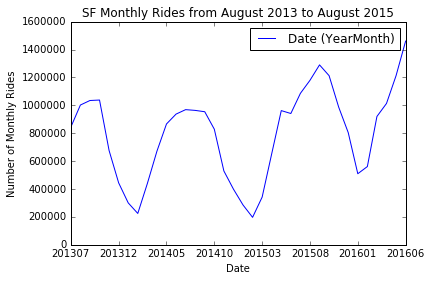

In [7]:
#Overview
print("start1")
df.groupby(['Date (YearMonth)']).agg({'Date (YearMonth)': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Rides")
plt.title("SF Monthly Rides from August 2013 to August 2015")
plt.savefig('SF_Rides Per Month Summary.png')


In [6]:
unique = np.unique(df['max temp'])
print(unique)
unique = np.unique(df['min temp'])
print(unique)
unique = np.unique(df['Pecipitation'])
print(unique)
unique = np.unique(df['avg wind'])
print(unique)

[15 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94 95 96 97 98]
[-1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 81 82 83]
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48
  0.5   0.51  0.52  0.53  0.54  0.57  0.61  0.62  0.64  0.65  0.67  0.69
  0.7   0.71  0.72  0.73  0.76  0.8   0.81  0.84  0.85  0.87  0.89  0.91
  0.92  0.96  1.01  1.02  1.08  1.11  1.12  1.17  1.18  1

start1
start2
start3
start4


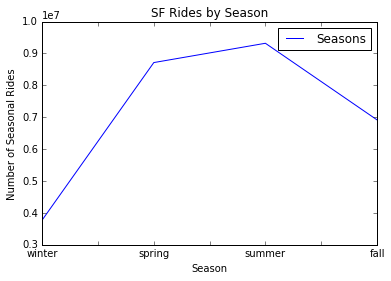

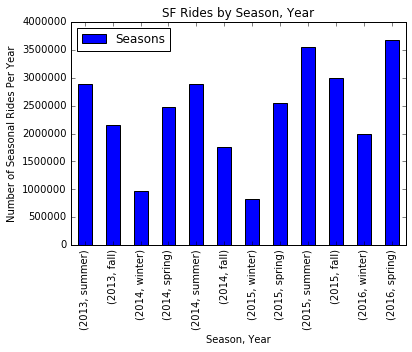

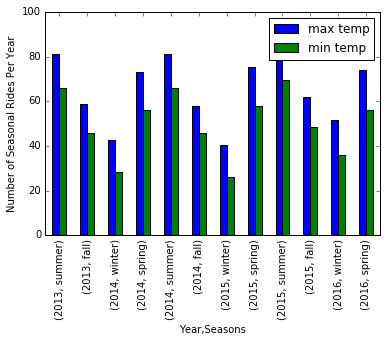

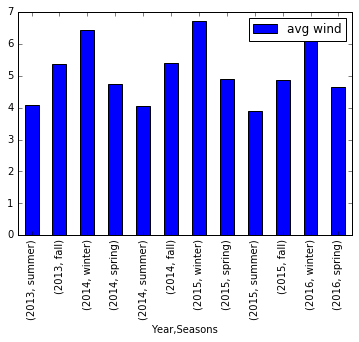

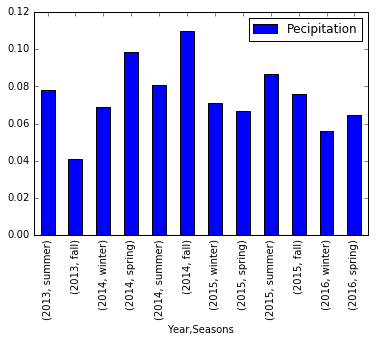

In [8]:
#How do seasons affect ridership? 
print("start1")
ranges = [0,3,6,9,12]
labels = ['winter','spring','summer','fall']
print("start2")
df['Seasons'] = pd.cut(df["Month"], ranges, labels=labels).astype('category')
df.groupby(['Seasons']).agg({'Seasons': np.count_nonzero}).plot()
plt.xlabel("Season")
plt.ylabel("Number of Seasonal Rides")
plt.title("SF Rides by Season")
plt.savefig('SF_Seasonal_Rides.png')

#Number of rides per season
print("start3")
df.groupby(['Year','Seasons']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
plt.xlabel("Season, Year")
plt.ylabel("Number of Seasonal Rides Per Year")
plt.title("SF Rides by Season, Year")
plt.savefig('SF_Year_Seasonal_Rides.png')

#Average Temps
print("start4")
df.groupby(['Year','Seasons']).agg({'max temp': np.mean, 'min temp': np.mean}).plot(kind='bar')
plt.ylabel("Number of Seasonal Rides Per Year")
#plt.axis((0,x2,25,250))
plt.gca().set_ylim([0,100])

#Precipitation
df.groupby(['Year','Seasons']).agg({'avg wind' : np.mean}).plot(kind='bar')

#Precipitation
df.groupby(['Year','Seasons']).agg({'Pecipitation' : np.mean}).plot(kind='bar')



(array([  1.01300000e+03,   4.10000000e+01,   2.10000000e+01,
          1.40000000e+01,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.   ,  0.497,  0.994,  1.491,  1.988,  2.485,  2.982,  3.479,
         3.976,  4.473,  4.97 ]),
 <a list of 10 Patch objects>)

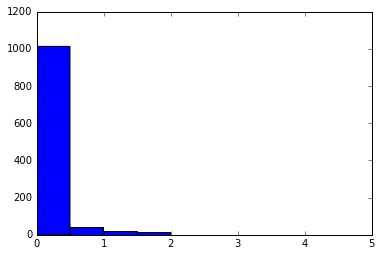

In [9]:
#Understanding weather distribution
nyc_precip = df.groupby(['Date']).agg({'Pecipitation':[np.mean, np.std]})
nyc_precip.head()
plt.hist(nyc_precip["Pecipitation"]["mean"])

start1


,count_nonzero,rides per day
min_temp,,
"(-10, 0]",1,4653.000000
"(0, 10]",18,6129.055556
"(10, 20]",55,8752.618182
"(20, 30]",115,12935.391304
"(30, 40]",172,18240.802326


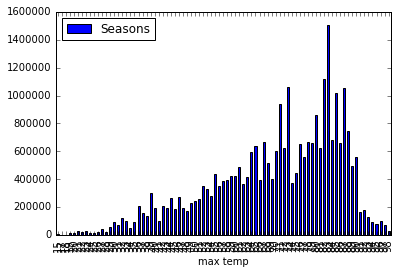

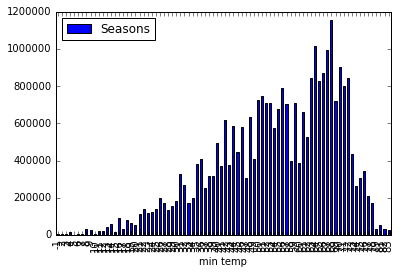

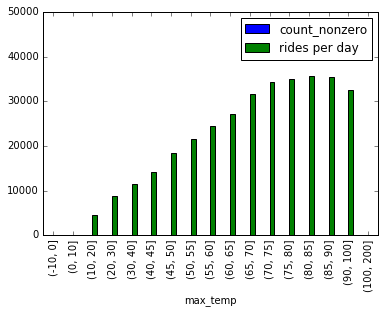

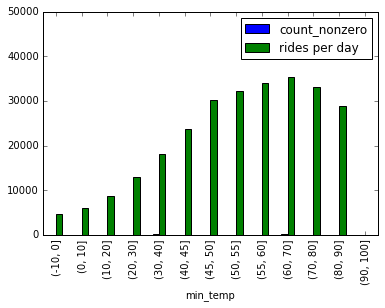

In [21]:
#How does temperature affect ridership? 
#How do seasons affect ridership?  max temp	min temp
#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
print("start1")
df.groupby(['max temp']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
df.groupby(['min temp']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')

df_maxtemp = df.groupby(['Date']).agg({'max temp':[np.mean], 'Seasons':[np.count_nonzero]})
df_maxtemp.columns = df_maxtemp.columns.droplevel(0)
ranges = [-10,0,10,20,30,40,45,50,55,60,65,70,75,80,85,90,100,200]
df_maxtemp['max_temp'] = pd.cut(df_maxtemp["mean"], ranges).astype('category')
df_maxtemp = df_maxtemp.groupby(['max_temp']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
df_maxtemp.columns = df_maxtemp.columns.droplevel(0)
df_maxtemp["rides per day"] = df_maxtemp["sum"] / df_maxtemp["count_nonzero"]
del df_maxtemp["sum"]
df_maxtemp["count_nonzero"]
df_maxtemp.plot(kind='bar')
plt.gca().set_ylim([0,50000])
df_maxtemp.head()


df_mintemp = df.groupby(['Date']).agg({'min temp':[np.mean], 'Seasons':[np.count_nonzero]})
df_mintemp.columns = df_mintemp.columns.droplevel(0)
ranges = [-10,0,10,20,30,40,45,50,55,60,70,80,90,100]
df_mintemp['min_temp'] = pd.cut(df_mintemp["mean"], ranges).astype('category')
df_mintemp = df_mintemp.groupby(['min_temp']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
df_mintemp.columns = df_mintemp.columns.droplevel(0)
df_mintemp["rides per day"] = df_mintemp["sum"] / df_mintemp["count_nonzero"]
del df_mintemp["sum"]
df_mintemp["count_nonzero"]
df_mintemp.plot(kind='bar')
plt.gca().set_ylim([0,50000])
df_mintemp.head()

start1
               count_nonzero  rides per day
Precipitation                              
(-0.1, 0]                740   28642.191892
(0, 0.5]                 274   23098.065693
(0.5, 1]                  40   16178.575000
(1, 1.5]                  21   14704.714286
(1.5, 2]                  14   17212.928571
(2, 5]                     3    3791.666667
(5, 10]                    0            NaN
(10, 300]                  0            NaN


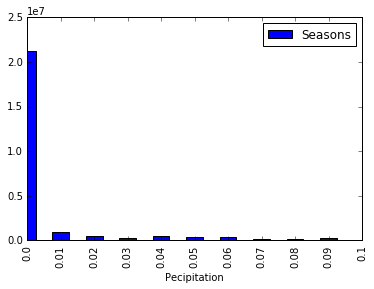

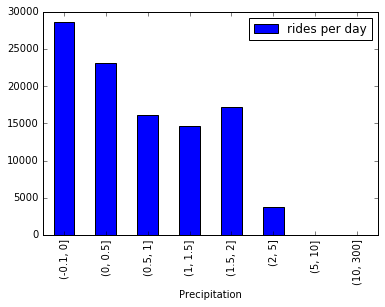

In [13]:
#How does precipitation affect ridership? Pecipitation
#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
print("start1")
df.groupby(['Pecipitation']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
plt.gca().set_xlim([0,10])
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')
#Precipitation = np.unique(sf_df['Precipitation_modified'])
#print(Precipitation)

df_precip = df.groupby(['Date']).agg({'Pecipitation':[np.mean], 'Seasons':[np.count_nonzero]})
df_precip.columns = df_precip.columns.droplevel(0)
ranges = [-0.1,0,0.5,1,1.5,2,5,10,300]
df_precip['Precipitation'] = pd.cut(df_precip["mean"], ranges).astype('category')
df_precip = df_precip.groupby(['Precipitation']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
df_precip.columns = df_precip.columns.droplevel(0)
df_precip["rides per day"] = df_precip["sum"] / df_precip["count_nonzero"]
del df_precip["sum"]
print(df_precip.head(10))
del df_precip["count_nonzero"]
df_precip.plot(kind='bar')

In [ ]:
#How do extreme weather events affect ridership? 

start1


,count_nonzero,rides per day
avg_wind,,
"(0, 2]",44,34949.477273
"(2, 4]",315,31590.085714
"(4, 6]",407,26930.417690
"(6, 8]",177,21137.152542
"(8, 10]",90,18231.577778
"(10, 15]",51,13156.294118
"(15, 20]",0,NaN
"(20, 100]",0,NaN


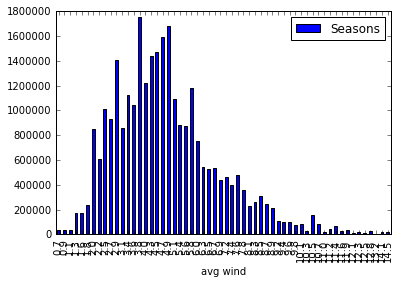

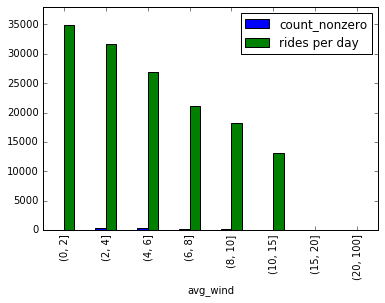

In [17]:
#How does wind affect ridership? avg wind

#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
print("start1")
df.groupby(['avg wind']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')

df_wind = df.groupby(['Date']).agg({'avg wind':[np.mean], 'Seasons':[np.count_nonzero]})
df_wind.columns = df_wind.columns.droplevel(0)
ranges = [0,2,4,6,8,10,15,20,100]
df_wind['avg_wind'] = pd.cut(df_wind["mean"], ranges).astype('category')
df_wind = df_wind.groupby(['avg_wind']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
df_wind.columns = df_wind.columns.droplevel(0)
df_wind["rides per day"] = df_wind["sum"] / df_wind["count_nonzero"]
del df_wind["sum"]
df_wind["count_nonzero"]
df_wind.plot(kind='bar')
plt.gca().set_ylim([0,38000])

df_wind.head(10)